# Scalable Models Of Probabilistic Forecasting For Fuzzy Time Series - Experiments of Chapter 2


[MINDS - Machine Intelligence and Data Science Lab ](http://www.minds.eng.ufmg.br/)

[Post Graduate Program in Electrical Engineering - PPGEE]()

[Federal University of Minas Gerais - UFMG]()

* **Author**: Petrônio Cândido de  Lima e Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SILVA, P.C.L)
* **Advisor**: Frederico Gadelha Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (GUIMARÃES, F. G)
* **Co-Advisor**: Hossein Javedani Sadaei  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-0848-9280" href="https://orcid.org/0000-0002-0848-9280" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SADAEI, H. J.)



In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br

<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>



## Library Installation

In [0]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-u47v3cq6
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-u47v3cq6
  Stored in directory: /tmp/pip-ephem-wheel-cache-1mza29cg/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS


## Common Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [0]:
from pyFTS.models.ensemble import ensemble
from pyFTS.models import hofts
from pyFTS.benchmarks import benchmarks, Util as bUtil
from pyFTS.common import Util

## Experiments database import

In [0]:
!wget -O experiments.db.gz https://www.dropbox.com/s/z45fq0bqdrtptu1/experiments.db.gz?dl=1
!gunzip experiments.db.gz

--2019-06-11 20:03:14--  https://uc6d1a42bd7a644e9fe154867f7b.dl.dropboxusercontent.com/cd/0/get/Aip7IFmV8ulEvP3VmX8IsQTdI3VYH6iQN9DV4KhyYtvhZeJ1KiiQ0dcYm6Drvqp2JrCIEo6uT1mlKosiF9JJq-LpzkIFD_Sv-rxfQD9NB7cRTw/file?dl=1
Resolving uc6d1a42bd7a644e9fe154867f7b.dl.dropboxusercontent.com (uc6d1a42bd7a644e9fe154867f7b.dl.dropboxusercontent.com)... 162.125.1.6, 2620:100:6016:6::a27d:106
Connecting to uc6d1a42bd7a644e9fe154867f7b.dl.dropboxusercontent.com (uc6d1a42bd7a644e9fe154867f7b.dl.dropboxusercontent.com)|162.125.1.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3627430 (3.5M) [application/binary]
Saving to: ‘experiments.db.gz’

experiments.db.gz   100%[===================>]   3.46M  --.-KB/s    in 0.06s   

2019-06-11 20:03:15 (56.7 MB/s) - ‘experiments.db.gz’ saved [3627430/3627430]



## Datasets

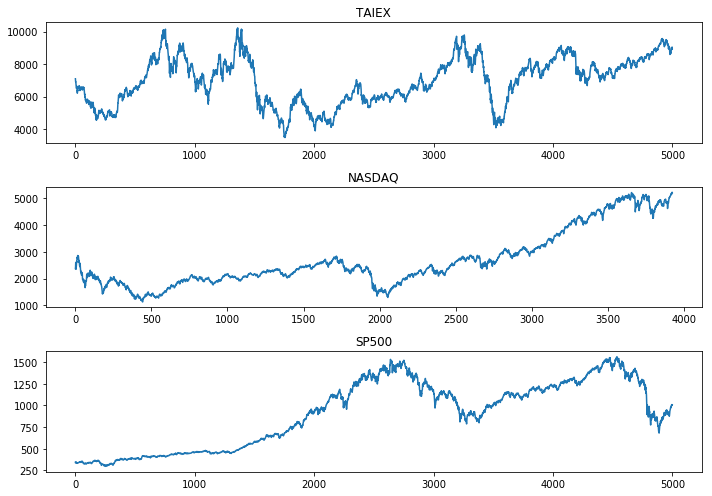

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

datasets = {}

datasets['TAIEX'] = TAIEX.get_data()[:5000]
datasets['NASDAQ'] = NASDAQ.get_data()[:5000]
datasets['SP500'] = SP500.get_data()[10000:15000]

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[10,7])

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
  ax[ct].plot(dataset)
  ax[ct].set_title(dataset_name)

plt.tight_layout()


## Grid Search

### Batch execution of the grid search

In [0]:
for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[hofts.HighOrderFTS, hofts.WeightedHighOrderFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[1, 2, 3],
                                    partitions=np.arange(10, 100, 5),
                                    progress=False, type='point',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="gridsearch")


### Analysis

In [0]:
from pyFTS.benchmarks import Util as bUtil

rmse = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model in ('HOFTS','WHOFTS') and measure = 'rmse'")

rmse['Partitions'] = [int.from_bytes(k, "little") for k in rmse['Partitions'].values]

rmse.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,230475,2019-06-10 19:06:39,TAIEX,gridsearch,point,HOFTS,,1,Grid,10,10,1,None,rmse,234.88
1,230478,2019-06-10 19:06:39,TAIEX,gridsearch,point,HOFTS,,1,Grid,15,14,1,None,rmse,174.90
2,230481,2019-06-10 19:06:39,TAIEX,gridsearch,point,HOFTS,,1,Grid,20,18,1,None,rmse,160.52
3,230484,2019-06-10 19:06:41,TAIEX,gridsearch,point,HOFTS,,1,Grid,25,22,1,None,rmse,138.73
4,230487,2019-06-10 19:06:41,TAIEX,gridsearch,point,HOFTS,,1,Grid,30,26,1,None,rmse,138.35


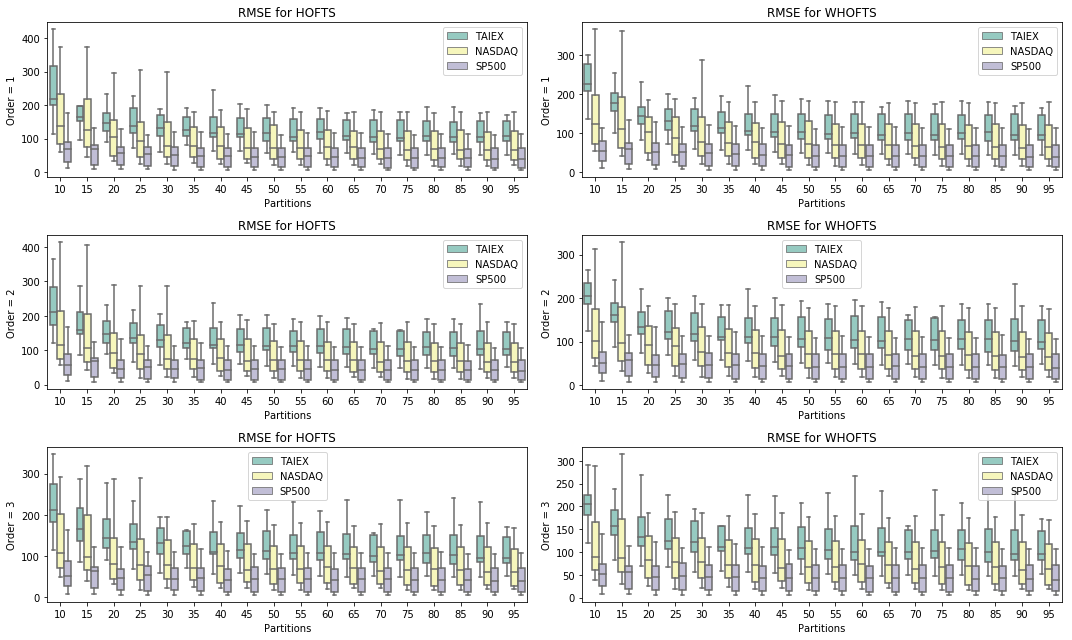

In [0]:
import seaborn as sns

orders = rmse['Order'].unique()
models = rmse['Model'].unique()

fig, ax = plt.subplots(nrows=len(orders), ncols=2, figsize=[15,3*len(orders)])

for co, order in enumerate(orders):
  for cm, model in enumerate(models):
  
    df = rmse[(rmse['Order']==order) & (rmse['Model']==model)]

    g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax[co][cm], 
                     palette="Set3")
    g1.legend(handles=None)
    ax[co][cm].set_title("RMSE for {}".format(model))
    ax[co][cm].set_ylabel("Order = {}".format(order))
    ax[co][cm].set_xlabel("Partitions")

    #box = g1.get_position()
    #g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    #g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)

    plt.tight_layout()

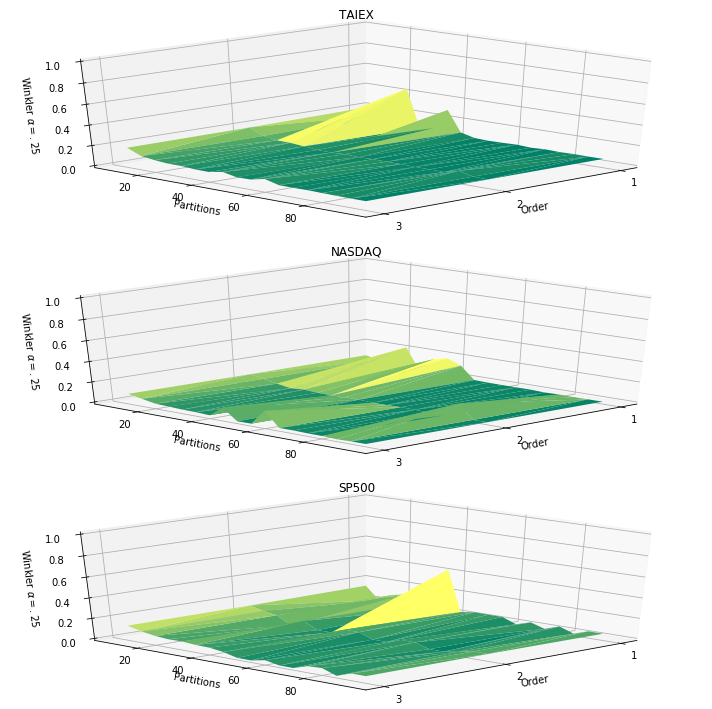

In [0]:
from sklearn import preprocessing

fig = plt.figure(figsize=[10,10])

nplots = len(datasets.keys())

for ct, dataset in enumerate(datasets.keys()):

  df = bUtil.get_dataframe_from_bd("experiments.db","tag = 'gridsearch' " 
                                    +" and dataset = '{}' and Model='WHOFTS' and measure = 'rmse'".format(dataset))

  df['Partitions'] = [int.from_bytes(k, "little") for k in df['Partitions'].values]
  
  min_max_scaler = preprocessing.MinMaxScaler()
  df['Value'] = min_max_scaler.fit_transform([[k] for k in df['Value'].values]).flatten()

  ax = fig.add_subplot(nplots, 1, ct+1, projection='3d')
  ax.plot_trisurf(df['Order'].values, df['Partitions'].values, df['Value'].values, cmap="summer", linewidth=0.2, antialiased=True)
  ax.view_init(30,45)
  ax.set_title(dataset) #"Error surface by order and number of partitions")
  ax.set_xlabel("Order")
  ax.set_xticks([1,2,3])
  ax.set_ylabel("Partitions")
  ax.set_zlabel("Winkler $\\alpha=.25$")
  ax.set_zlim([0,1])

plt.tight_layout()
plt.show()


## Residual Analysis

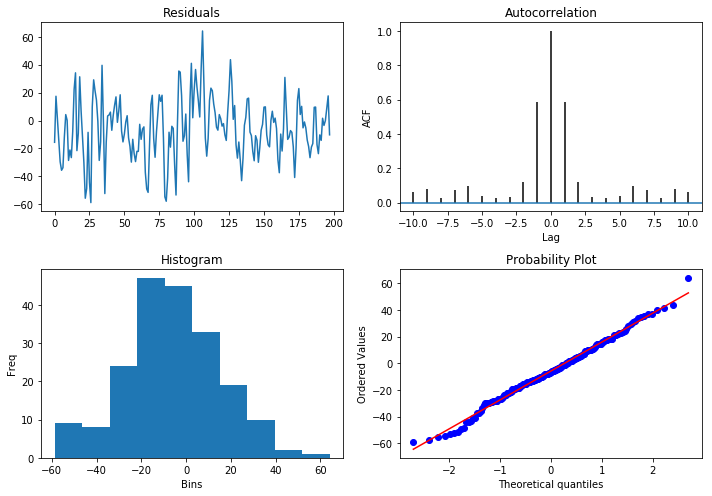

,Lag,Statistic,p-Value,Critical Value,Result
0,1,61.935542,3.552714e-15,3.841459,H0 accepted
1,2,62.518764,2.653433e-14,5.991465,H0 accepted
2,3,62.834903,1.456613e-13,7.814728,H0 accepted


In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

train = datasets['SP500'][2000:2800]
test = datasets['SP500'][2800:3000]

fs = Grid.GridPartitioner(data=train, npart=55)
    
model1 = hofts.HighOrderFTS(partitioner=fs, order=1)
model1.fit(train)
forecasts = model1.predict(test)
res = ResidualAnalysis.residuals(test, forecasts, order=model1.order + 1)

ResidualAnalysis.single_plot_residuals(res,order=1)
ResidualAnalysis.ljung_box_test(res,alpha=0.05)



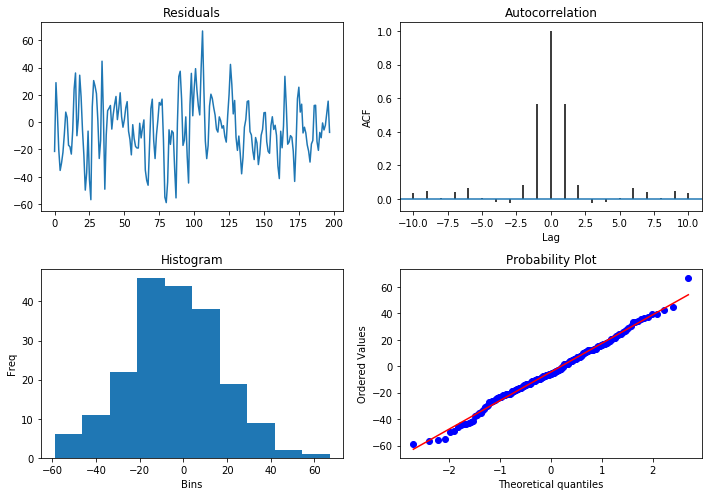

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

train = datasets['SP500'][2000:2800]
test = datasets['SP500'][2800:3000]

fs = Grid.GridPartitioner(data=train, npart=55)
    
model1 = hofts.WeightedHighOrderFTS(partitioner=fs, order=1)
model1.fit(train)
forecasts = model1.predict(test)
res = ResidualAnalysis.residuals(test, forecasts, order=model1.order + 1)

ResidualAnalysis.single_plot_residuals(res,order=1)


In [0]:
ljung_box_test = ResidualAnalysis.ljung_box_test(res,alpha=0.05)
print(lbt.to_latex())

\begin{tabular}{lrrrrl}
\toprule
{} &  Lag &  Statistic &       p-Value &  Critical Value &       Result \\
\midrule
0 &    1 &  60.821810 &  6.217249e-15 &        3.841459 &  H0 accepted \\
1 &    2 &  61.161621 &  5.240253e-14 &        5.991465 &  H0 accepted \\
2 &    3 &  62.075286 &  2.117195e-13 &        7.814728 &  H0 accepted \\
\bottomrule
\end{tabular}



In [0]:
from pyFTS.common import Util as cUtil
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import ResidualAnalysis


res1 = {}
res2 = {}

for dataset_name, dataset in datasets.items():
  res1[dataset_name] = []
  res2[dataset_name] = []
  for ct, train, test in cUtil.sliding_window(dataset, 1000, .9, inc=.5):
    
    fs = Grid.GridPartitioner(data=train, npart=35)
    
    model1 = hofts.HighOrderFTS(partitioner=fs, order=1)
    model1.fit(train)
    forecasts = model1.predict(test)
    res1[dataset_name].extend(
        ResidualAnalysis.residuals(test, forecasts, order=model1.order + 1)
    )
    
    model2 = hofts.WeightedHighOrderFTS(partitioner=fs, order=1)
    model2.fit(train)
    forecasts = model2.predict(test)
    res2[dataset_name].extend(
        ResidualAnalysis.residuals(test, forecasts, order=model2.order + 1)
    )
    

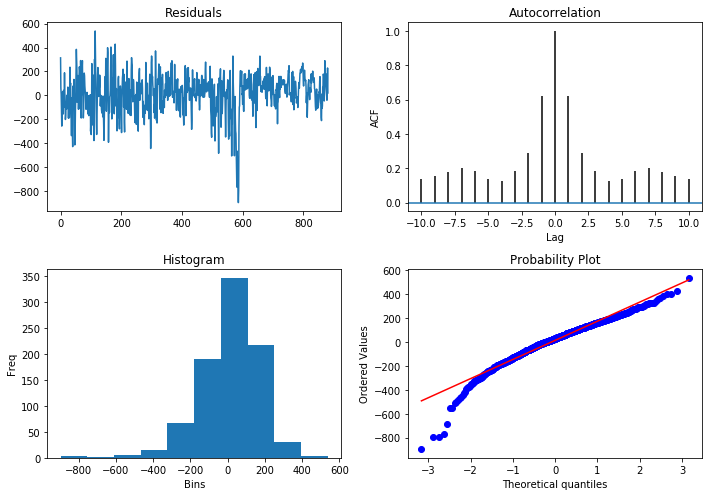

In [0]:
from pyFTS.benchmarks import ResidualAnalysis

ResidualAnalysis.single_plot_residuals(res1['TAIEX'],order=1)

In [0]:
from pyFTS.benchmarks import ResidualAnalysis

ljung_box_test = ResidualAnalysis.ljung_box_test(res2['TAIEX'],alpha=0.05)
ljung_box_test
#print(ljung_box_test.to_latex())

,Lag,Statistic,p-Value,Critical Value,Result
0,1,336.838522,0.0,3.841459,H0 accepted
1,2,394.472179,0.0,5.991465,H0 accepted
2,3,411.754344,0.0,7.814728,H0 accepted


## Samples

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

train = TAIEX.get_data()[:800]
test = TAIEX.get_data()[800:1000]


### Membership Functions

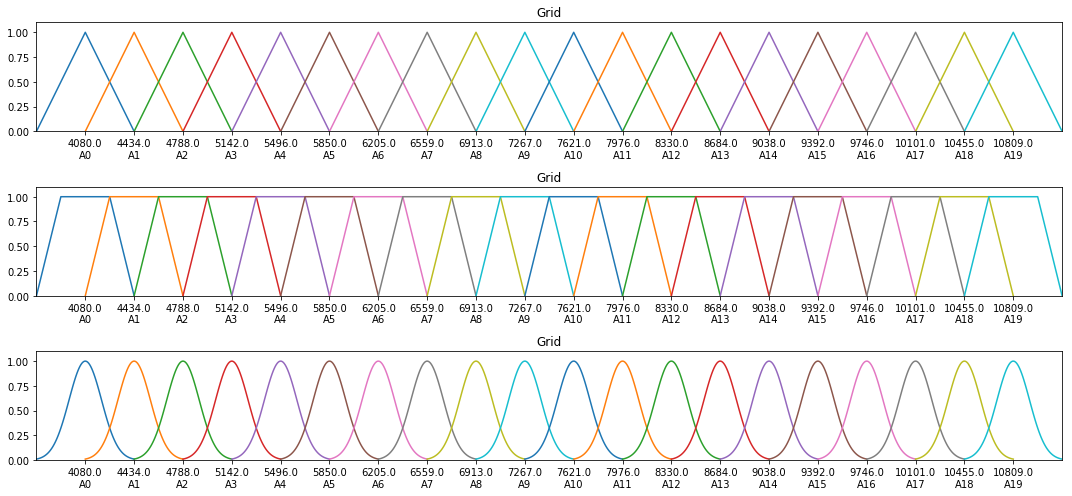

In [0]:
from pyFTS.partitioners import Grid
from pyFTS.common import Membership

mfs = [Membership.trimf, Membership.trapmf, Membership.gaussmf]

k = 15

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[15,7])

for ct, mf in enumerate(mfs):
  particionador = Grid.GridPartitioner(data=train, npart=20, func=mf)
  particionador.plot(ax[ct])
  
plt.tight_layout()

### Partitioners

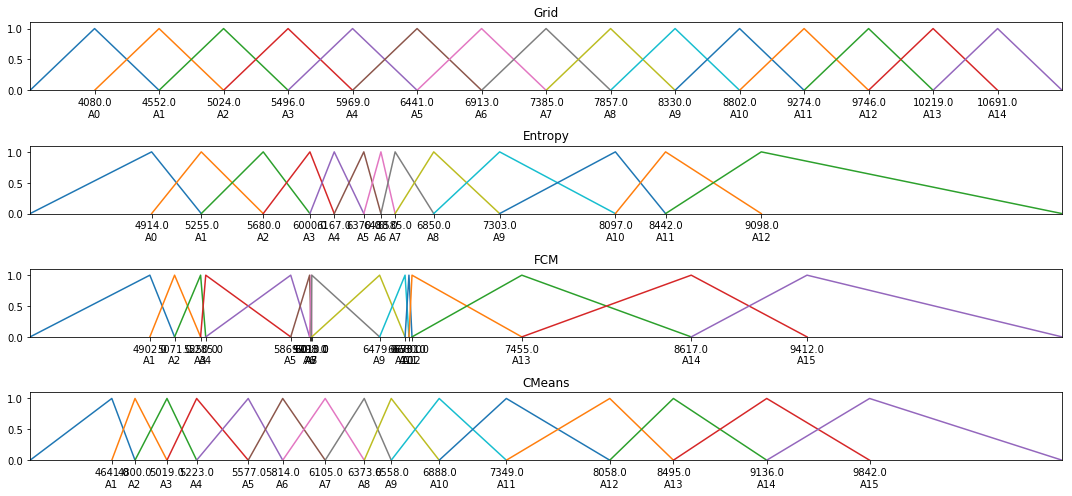

In [0]:
from pyFTS.partitioners import Grid, FCM, CMeans, Entropy

metodos = [Grid.GridPartitioner, Entropy.EntropyPartitioner, FCM.FCMPartitioner, CMeans.CMeansPartitioner ]

k = 15

fig, ax = plt.subplots(nrows=4, ncols=1,figsize=[15,7])

for contador, metodo in enumerate(metodos):
  particionador = metodo(data=train, npart=k)
  particionador.plot(ax[contador])
  
plt.tight_layout()

### Impact of order

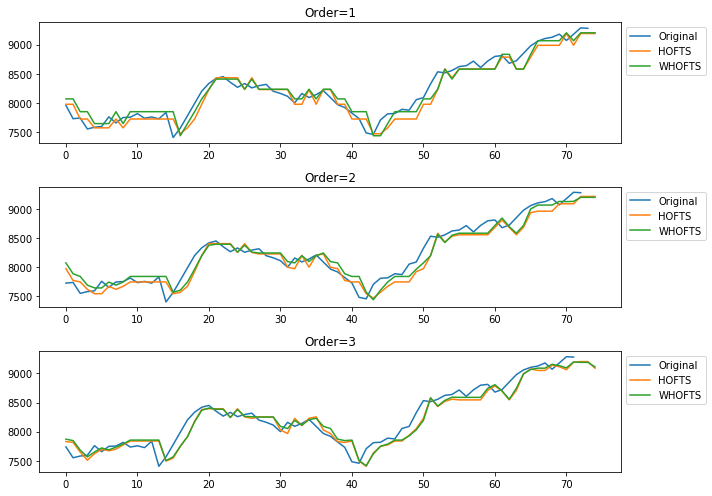

In [0]:
fs = Grid.GridPartitioner(data=train, npart=35)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[10,7])

window = 75

for order in [1,2,3]:

  model1 = hofts.HighOrderFTS(partitioner=fs, order=order)
  model1.fit(train)
  forecasts1 = model1.predict(test)

  model2 = hofts.WeightedHighOrderFTS(partitioner=fs, order=order)
  model2.fit(train)
  forecasts2 = model2.predict(test)

  ax[order-1].plot(test[order:window], label='Original')
  ax[order-1].plot(forecasts1[:window], label='HOFTS')
  ax[order-1].plot(forecasts2[:window], label='WHOFTS')
  ax[order-1].set_title("Order={}".format(order))
  
  handles, labels = ax[order-1].get_legend_handles_labels()
  lgd = ax[order-1].legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
  
  
plt.tight_layout()


### Impact of the number of partitions

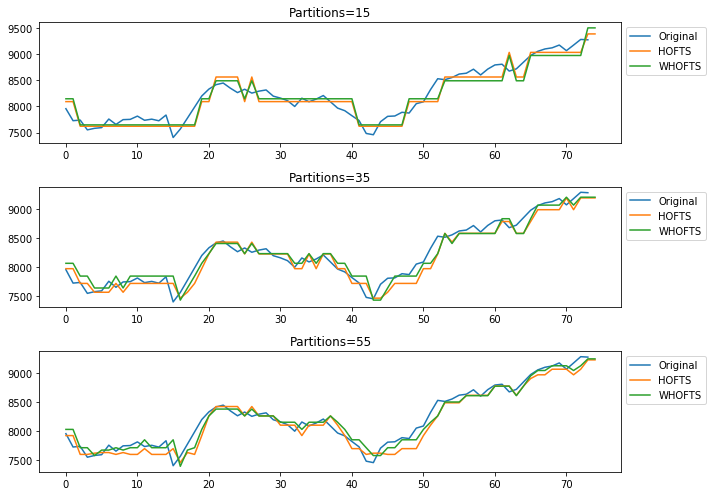

In [0]:

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[10,7])

order = 1

for ct, part in enumerate([15,35,55]):
  
  fs = Grid.GridPartitioner(data=train, npart=part)

  model1 = hofts.HighOrderFTS(partitioner=fs, order=order)
  model1.fit(train)
  forecasts1 = model1.predict(test)

  model2 = hofts.WeightedHighOrderFTS(partitioner=fs, order=order)
  model2.fit(train)
  forecasts2 = model2.predict(test)

  ax[ct].plot(test[order:window], label='Original')
  ax[ct].plot(forecasts1[:window], label='HOFTS')
  ax[ct].plot(forecasts2[:window], label='WHOFTS')
  ax[ct].set_title("Partitions={}".format(part))
  
  handles, labels = ax[ct].get_legend_handles_labels()
  lgd = ax[ct].legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
  
  
plt.tight_layout()

